In [2]:
import geopandas as gpd
import pandas as pd
import numpy as np

In [3]:
change_type_map = {'Demolition': 0, 'Road': 1, 'Residential': 2, 'Commercial': 3, 'Industrial': 4,
       'Mega Projects': 5}

## Read csvs

train_df = gpd.read_file('train.geojson', index_col=0)
test_df = gpd.read_file('test.geojson', index_col=0)


In [192]:
train_df[train_df.isna()]

,urban_type,geography_type,change_type,img_red_mean_date1,img_green_mean_date1,img_blue_mean_date1,img_red_std_date1,img_green_std_date1,img_blue_std_date1,img_red_mean_date2,...,date1,change_status_date1,date2,change_status_date2,date3,change_status_date3,date4,change_status_date4,index,geometry
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
296142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
296143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
296144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


In [4]:
COLORS = ['red', 'green', 'blue']
METRICS = ['std', 'mean']

CHANGE_TYPE_MAP = {'Demolition': 0, 'Road': 1, 'Residential': 2, 'Commercial': 3, 'Industrial': 4,
                   'Mega Projects': 5}
CHANGE_STATUS_MAP = {None: 0, 'Greenland': 1, 'Land Cleared': 2, 'Materials Introduced': 3,
                     'Prior Construction': 4, 'Excavation': 5, 'Construction Started': 6,
                     'Construction Midway': 7, 'Materials Dumped': 8, 'Construction Done': 9,
                     'Operational': 10}

GEOGRAPHY_TYPES = ['Dense Forest', 'Grass Land', 'Sparse Forest', 'Farms', 'River',
                   'Coastal', 'Lakes', 'Barren Land', 'Desert', 'Hills', 'Snow']
URBAN_TYPES = ['Sparse Urban', 'Rural', 'Dense Urban', 'Urban Slum', 'Industrial']

COLUMNS_TO_DROP = ['geography_type', 'urban_type', 'geometry', 'date0', 'date1', 'date2', 'date3', 'date4', 'index']
DATE_COLUMNS = ['date0', 'date1', 'date2', 'date3', 'date4']

BINARY_FEATURES = ['Dense Forest', 'Grass Land', 'Sparse Forest', 'Farms', 'River',
                   'Coastal', 'Lakes', 'Barren Land', 'Desert', 'Hills', 'Snow',
                   'Sparse Urban', 'Rural', 'Dense Urban', 'Urban Slum', 'Industrial']
CATEGORICAL_FEATURES = ['change_status_date0', 'change_status_date1', 'change_status_date2', 'change_status_date3',
                      'change_status_date4']


CHANGE_STATUS_VALUE_COLUMNS = ['change_status_value_date0', 'change_status_value_date1', 'change_status_value_date2', 'change_status_value_date3', 'change_status_value_date4']
CHANGE_STATUS_COLUMNS = ['change_status_date0', 'change_status_date1', 'change_status_date2', 'change_status_date3', 'change_status_date4']


In [5]:
copied_train_df = train_df.copy(deep=True)

In [6]:
copied_train_df['change_type'] = copied_train_df['change_type'].map(CHANGE_TYPE_MAP)


In [7]:
copied_train_df = copied_train_df.dropna(subset = ['img_red_std_date1'])
copied_train_df = copied_train_df.dropna(subset = ['change_status_date4'])
copied_train_df = copied_train_df.dropna(subset = ['change_status_date3'])
copied_train_df = copied_train_df.dropna(subset = ['change_status_date2'])
copied_train_df = copied_train_df.dropna(subset = ['change_status_date1'])
copied_train_df = copied_train_df.dropna(subset = ['change_status_date0'])

In [8]:
copied_train_df[DATE_COLUMNS] = copied_train_df[DATE_COLUMNS].apply(lambda x: pd.to_datetime(x, format='%d-%m-%Y', errors='coerce'))

In [9]:
def sort_dates(row):

    # Sort columns by date
    columns_order = np.argsort(row[DATE_COLUMNS].values)
    new_row = row.copy(deep=True)

    # Update date and change_status order
    for i in range(5):
        new_row[f'date{i}'] = row[f'date{columns_order[i]}']
        new_row[f'change_status_date{i}'] = row[f'change_status_date{columns_order[i]}']

    # Update color metrics order
    for metric in METRICS:
        for color in COLORS:
            for i in range(1, 6):
                new_row[f'img_{color}_{metric}_date{i}'] = row[f'img_{color}_{metric}_date{columns_order[i-1]+1}']

    return new_row

copied_train_df = copied_train_df.apply(sort_dates, axis=1)

In [10]:
# One-hot encoding
for geograph_type in GEOGRAPHY_TYPES:
    copied_train_df["geography_type" + geograph_type] = copied_train_df['geography_type'].apply(lambda x: 1 if geograph_type in x else 0)
for urban_type in URBAN_TYPES:
    copied_train_df["urban_type" + urban_type] = copied_train_df['urban_type'].apply(lambda x: 1 if urban_type in x else 0)


In [11]:
for i in range(5): copied_train_df[f'change_status_date{i}'] = copied_train_df[f'change_status_date{i}'].map(CHANGE_STATUS_MAP)

In [12]:
copied_train_df['area'] = copied_train_df['geometry'].area
copied_train_df['length'] = copied_train_df['geometry'].length
copied_train_df['centroid_x'] = copied_train_df['geometry'].centroid.x
copied_train_df['centroid_y'] = copied_train_df['geometry'].centroid.y


c:\Users\merte\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.
c:\Users\merte\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  
c:\Users\merte\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  This is separate from the ipykernel package so we can avoid doing imports until
c:\Users\merte\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Geometry is in a geographic CRS

In [13]:
copied_of_copied_train_df = copied_train_df.copy(deep=True)

In [14]:
## Fix date
copied_of_copied_train_df[DATE_COLUMNS] = copied_of_copied_train_df[DATE_COLUMNS].apply(lambda x: pd.to_datetime(x, format='%d-%m-%Y', errors='coerce'))

## Create deltas: color and time
for metric in METRICS:
    for color in COLORS:
        for i in range(2, 6):
            delta = copied_of_copied_train_df[f'img_{color}_{metric}_date{i}'] - copied_of_copied_train_df[f'img_{color}_{metric}_date{i-1}']
            copied_of_copied_train_df[f'img_{color}_{metric}_delta{i}'] = delta
        copied_of_copied_train_df[f'img_{color}_{metric}_delta_total'] = copied_of_copied_train_df[f'img_{color}_{metric}_date5'] - copied_of_copied_train_df[f'img_{color}_{metric}_date1']
for i in range(1, 5):
    copied_of_copied_train_df[f'date_delta{i}'] = copied_of_copied_train_df[f'date{i}'] - copied_of_copied_train_df[f'date{i-1}']
copied_of_copied_train_df['date_delta_total'] = copied_of_copied_train_df[f'date4'] - copied_of_copied_train_df[f'date1']

In [15]:
## Standardizing colors mean by the proportion
for i in range(1, 6):
    color_sum = copied_of_copied_train_df[f'img_blue_mean_date{i}'] + copied_of_copied_train_df[f'img_green_mean_date{i}'] + copied_of_copied_train_df[f'img_red_mean_date{i}']
    for color in COLORS:
        copied_of_copied_train_df[f'img_{color}_mean_prop_date{i}'] = copied_of_copied_train_df[f'img_{color}_mean_date{i}']/color_sum

In [17]:
## Create img_{color}_mean_prop_rate
num_samples = copied_of_copied_train_df.shape[0]
ones = np.ones((num_samples,5,1))

for color in COLORS:
    coef = np.zeros((num_samples))
    COLOR_MEAN_COLUMNS = [f'img_{color}_mean_prop_date{i}' for i in range (1,6)]

    Y = np.array(copied_of_copied_train_df[COLOR_MEAN_COLUMNS].astype(float))
    X = np.array(copied_of_copied_train_df[DATE_COLUMNS].apply(np.float64))[:,:,np.newaxis]
    X = np.dstack((ones,X))
    nan_mask = np.isnan(Y) | np.isnan(X[:,:,1])
    X[nan_mask,:] = 0
    Y[nan_mask] = 0

    eye = np.eye(2)*0.0001
    for i in range(num_samples):
        x = X[i].reshape((5,2))
        y = Y[i].reshape((5))
        coef[i] = (np.linalg.inv(eye+x.T@x)@x.T@y)[1]

    copied_of_copied_train_df[f'img_{color}_mean_prop_rate'] = coef



In [19]:
## Create img_{color}_std_rate
for color in COLORS:
    coef = np.zeros((num_samples))
    COLOR_STD_COLUMNS = [f'img_{color}_std_date{i}' for i in range (1,6)]

    Y = np.array(copied_of_copied_train_df[COLOR_STD_COLUMNS].astype(float))
    X = np.array(copied_of_copied_train_df[DATE_COLUMNS].apply(np.float64))[:,:,np.newaxis]
    X = np.dstack((ones,X))
    nan_mask = np.isnan(Y) | np.isnan(X[:,:,1])
    X[nan_mask,:] = 0
    Y[nan_mask] = 0

    eye = np.eye(2)*0.0001
    for i in range(num_samples):
        x = X[i].reshape((5,2))
        y = Y[i].reshape((5))
        coef[i] = (np.linalg.inv(eye+x.T@x)@x.T@y)[1]

    copied_of_copied_train_df[f'img_{color}_std_rate'] = coef

In [20]:
delta_dates = ['date_delta1','date_delta2', 'date_delta3', 'date_delta4', 'date_delta_total']
for delta_date in delta_dates: copied_of_copied_train_df[delta_date] = copied_of_copied_train_df[delta_date].dt.days

In [21]:
ready_to_train_df = copied_of_copied_train_df.copy(deep=True)

In [24]:
bounds = ready_to_train_df['geometry'].bounds
ready_to_train_df['area_to_length_ratio'] = ready_to_train_df['area'] / ready_to_train_df['length'] # the more, the closer to square
ready_to_train_df['angle'] = np.arctan((bounds['maxy']-bounds['miny'])/(bounds['maxx']-bounds['minx']))


In [125]:
## Create change_status_values
for i in range(len(CHANGE_STATUS_COLUMNS)):
    ready_to_train_df[CHANGE_STATUS_VALUE_COLUMNS[i]] = ready_to_train_df[CHANGE_STATUS_COLUMNS[i]].map(CHANGE_STATUS_MAP)

In [135]:
## Create civilization_rate
num_samples = ready_to_train_df.shape[0]
coef = np.zeros((num_samples))
time_ctt = 1e9*60*90*24
ones = np.ones((num_samples,5,1))

Y = np.array(ready_to_train_df[CHANGE_STATUS_COLUMNS].astype(float))
Y_nan_mask = np.isnan(Y)
X = np.array(ready_to_train_df[DATE_COLUMNS].apply(np.float64))[:,:,np.newaxis]/time_ctt
X = np.dstack((ones,X))
X[Y_nan_mask,:] = 0
Y[Y_nan_mask] = 0

eye = np.eye(2)*0.0001
for i in range(num_samples):
    x = X[i].reshape((5,2))
    y = Y[i].reshape((5))
    coef[i] = (np.linalg.inv(eye+x.T@x)@x.T@y)[1]
    #print(y, train_df["change_type"].iloc[i])
ready_to_train_df["civilizating_rate"] = coef

In [29]:
ready_to_train_df[DATE_COLUMNS] = ready_to_train_df[DATE_COLUMNS].apply(np.float64)

In [32]:
list(ready_to_train_df.columns)

['urban_type',
 'geography_type',
 'change_type',
 'img_red_mean_date1',
 'img_green_mean_date1',
 'img_blue_mean_date1',
 'img_red_std_date1',
 'img_green_std_date1',
 'img_blue_std_date1',
 'img_red_mean_date2',
 'img_green_mean_date2',
 'img_blue_mean_date2',
 'img_red_std_date2',
 'img_green_std_date2',
 'img_blue_std_date2',
 'img_red_mean_date3',
 'img_green_mean_date3',
 'img_blue_mean_date3',
 'img_red_std_date3',
 'img_green_std_date3',
 'img_blue_std_date3',
 'img_red_mean_date4',
 'img_green_mean_date4',
 'img_blue_mean_date4',
 'img_red_std_date4',
 'img_green_std_date4',
 'img_blue_std_date4',
 'img_red_mean_date5',
 'img_green_mean_date5',
 'img_blue_mean_date5',
 'img_red_std_date5',
 'img_green_std_date5',
 'img_blue_std_date5',
 'date0',
 'change_status_date0',
 'date1',
 'change_status_date1',
 'date2',
 'change_status_date2',
 'date3',
 'change_status_date3',
 'date4',
 'change_status_date4',
 'index',
 'geometry',
 'geography_typeDense Forest',
 'geography_typeGrass

In [182]:
useful_features = ['civilizating_rate', 'centroid_x',
 'centroid_y', 'img_blue_std_date5',
'img_green_std_date5',
'change_status_value_date0',
'change_status_value_date2',
'date0',
'change_status_value_date4',
'img_red_std_delta_total',
'change_status_value_date3',
'img_green_std_delta_total',
'change_status_value_date1',
'img_blue_std_delta_total',
'area_to_length_ratio', 'geography_typeDense Forest',
 'geography_typeGrass Land',
 'geography_typeSparse Forest',
 'geography_typeFarms',
 'geography_typeRiver',
 'geography_typeCoastal',
 'geography_typeLakes',
 'geography_typeBarren Land',
 'geography_typeDesert',
 'geography_typeHills',
 'geography_typeSnow',
 'urban_typeSparse Urban',
 'urban_typeRural',
 'urban_typeDense Urban',
 'urban_typeUrban Slum',
 'urban_typeIndustrial']


a = ['geography_typeDense Forest',
 'geography_typeGrass Land',
 'geography_typeSparse Forest',
 'geography_typeFarms',
 'geography_typeRiver',
 'geography_typeCoastal',
 'geography_typeLakes',
 'geography_typeBarren Land',
 'geography_typeDesert',
 'geography_typeHills',
 'geography_typeSnow',
 'urban_typeSparse Urban',
 'urban_typeRural',
 'urban_typeDense Urban',
 'urban_typeUrban Slum',
 'urban_typeIndustrial']


useful_features = [ 'geography_typeFarms', 'geography_typeRiver', 'img_red_mean_date2',
 'geography_typeCoastal', 'geography_typeLakes', 'urban_typeUrban Slum', 'urban_typeIndustrial', 'img_blue_mean_date3',
 'civilizating_rate', 'centroid_y', 'img_green_mean_date5', 'img_green_mean_date3', 'img_red_mean_date5', 'date0', 'date3',
 'area_to_length_ratio', 'area', 'date_delta_total', 'change_status_date4', 'change_status_date0', 'change_status_date1', 'date1'
]

In [189]:
ready_to_train_df[["date_delta_total"]].min()

date_delta_total    701
dtype: int64

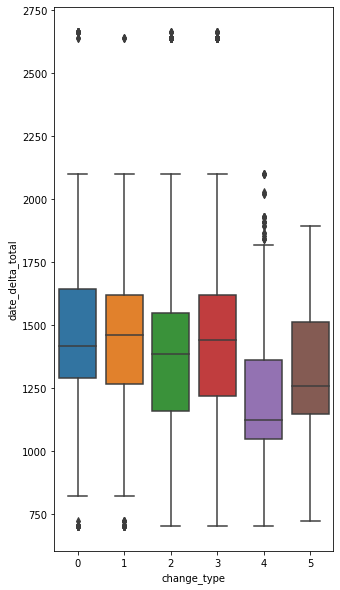

In [190]:
import seaborn as sns
plt.figure(figsize=(5, 10))
sns.boxplot(data= ready_to_train_df, x= 'change_type', y = 'date_delta_total')

In [183]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

y = ready_to_train_df["change_type"]

X = ready_to_train_df[useful_features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=50)



clf = RandomForestClassifier(n_estimators=100, random_state=50, max_features=int(len(useful_features)*0.5), max_depth=200, min_samples_leaf=10)
clf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=200, max_features=11,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=50, verbose=0,
                       warm_start=False)

In [184]:
from sklearn.metrics import f1_score, precision_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_predicted_train = clf.predict(X_train)

print(precision_score(y_train, y_predicted_train, average="micro"))
print(f1_score(y_train, y_predicted_train, average="macro"))


0.8318367099080772
0.5263657943754486


In [185]:

y_predicted = clf.predict(X_test)

print(precision_score(y_test, y_predicted, average="micro"))
print(f1_score(y_test, y_predicted, average="macro"))

0.7567973766908047
0.47336446199272536


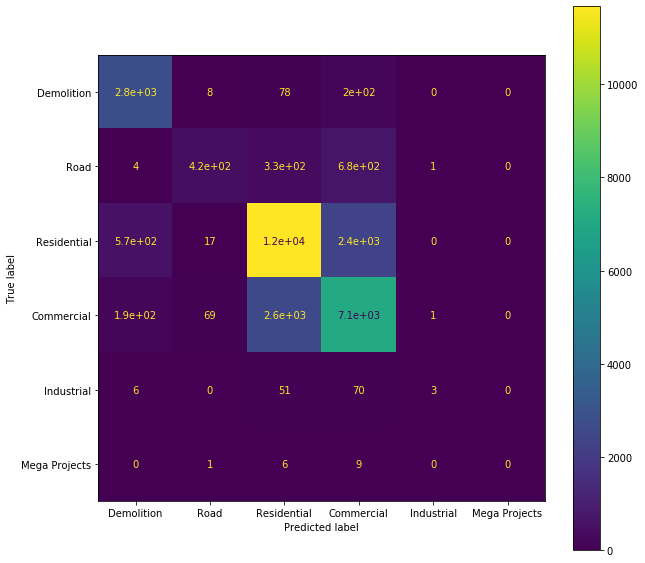

In [176]:
fig, ax = plt.subplots(figsize=(10,10))
cmd = ConfusionMatrixDisplay(confusion_matrix(y_test, y_predicted), display_labels=list(CHANGE_TYPE_MAP.keys()))
cmd.plot(ax=ax)
plt.show()

In [64]:
list(CHANGE_TYPE_MAP.keys())

['Demolition',
 'Road',
 'Residential',
 'Commercial',
 'Industrial',
 'Mega Projects']